# Portfolio Optimization

## 데이터 준비

### 대상 데이터 선택
융합기술원 자산배분 모델 데이터 기준 활용

최종 선택 데이터 - 융기원 데이터 기준에 금(Gold) 추가
| 자산군 | 세부자산군 | INDEX | ETF |
| --- | --- | --- | --- |
| 주식 | 국내주식 | KOSPI INDEX |  |
|  | 선진국주식 | M1WO INDEX |  |
|  | 신흥국주식 | M1EF INDEX |  |
| 채권 | 국내채권 | KBPMABIN INDEX |  |
|  | 선진국채권 | BTSYTRUH INDEX |  |
|  | 신흥국채권 | JPEIGLBL INDEX |  |
|  | 해외크레딧 | LGCPTRUU INDEX |  |
| 대체 | 부동산 | RUGL INDEX |  |
|  | 원자재 | BCOMTR INDEX |  |
|  | 금 | BCOMGCTR INDEX |  |
|  | 유동성 |  |  |

### 데이터 로딩
./data 폴더의 BloombergMain.py (융기원 코드 활용) .csv 형태로 준비

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('./data/data.csv', index_col=0, parse_dates=True)
# df = pd.read_csv('https://raw.githubusercontent.com/suhan-jung/portfolio_optimization/master/data/data.csv', index_col=0, parse_dates=True) # 구글 코랩등 사용을 위해 외부 링크로 준비
print(data.shape)
df = data.interpolate(method='linear', limit_direction='forward') # 연휴에 따른 급격한 변화를 smoothing해주는 것이 필요함
# df_dropna = df.dropna() # NA는 행 자체를 삭제(대세에 지장 없음) 하지만 장기적으로는 휴일 관련 interpolation을 통해 연휴에 따른 급격한 변화를 smoothing해주는 것이 필요함
print(df.shape)
df_week = df.resample('W').last() # 주가를 기준으로 주를 나누어 평균을 구함
df_week
# df_interpolate.loc["2011-02-01":"2011-02-28"]


(2856, 10)
(2856, 10)


,KOSPI Index,M1WO Index,M1EF Index,KBPMABIN Index,BTSYTRUH Index,JPEIGLBL Index,LGCPTRUU Index,RUGL Index,BCOMTR Index,BCOMGCTR Index
Date,,,,,,,,,,
2011-01-09,2086.2000,3128.90,435.47,181.6600,478.6380,525.46,194.4800,2903.130,317.1871,353.0689
2011-01-16,2108.1700,3196.58,440.40,181.6300,478.1981,527.05,196.0386,2940.320,324.8577,350.8885
2011-01-23,2069.9200,3181.31,431.67,181.3500,477.3528,523.26,196.7907,2917.890,325.3498,345.8246
2011-01-30,2107.8700,3180.99,427.83,181.4100,477.6058,519.15,197.6449,2935.700,324.1105,345.6032
2011-02-06,2079.3125,3253.89,429.32,181.0875,475.2230,521.47,196.1482,2968.390,329.5200,347.4938
...,...,...,...,...,...,...,...,...,...,...
2021-11-21,2971.0200,9708.98,624.90,255.2599,703.0671,919.80,298.4202,6629.446,218.4979,435.9218
2021-11-28,2936.4400,9445.56,602.30,256.4988,704.3186,905.23,297.6269,6512.336,213.7845,420.3630
2021-12-05,2968.3300,9311.13,603.46,257.0172,707.2739,915.52,299.2341,6447.207,204.5839,419.3797


### 기초 데이터 산출
수익율 계산
$$ t, t+1 사이의 수익율 R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} $$

In [2]:
filter = ['KOSPI Index', 'M1WO Index', 'KBPMABIN Index', 'BTSYTRUH Index']
# df = df[filter]

In [3]:
d_log_ret = np.log(df).diff(1).dropna()
w_log_ret = np.log(df_week).diff(1).dropna()
cum_d_log_ret = d_log_ret.cumsum()
total_d_log_ret = d_log_ret.sum()
annual_d_log_ret = total_d_log_ret * 250/len(d_log_ret)

vol_d_log_ret = d_log_ret.std()
annual_vol_d_log_ret = vol_d_log_ret * np.sqrt(250)

cov_d_log_ret = d_log_ret.cov()
annual_cov_d_log_ret = cov_d_log_ret * 250
cov_w_log_ret = w_log_ret.cov()
annual_cov_w_log_ret = cov_w_log_ret * 52


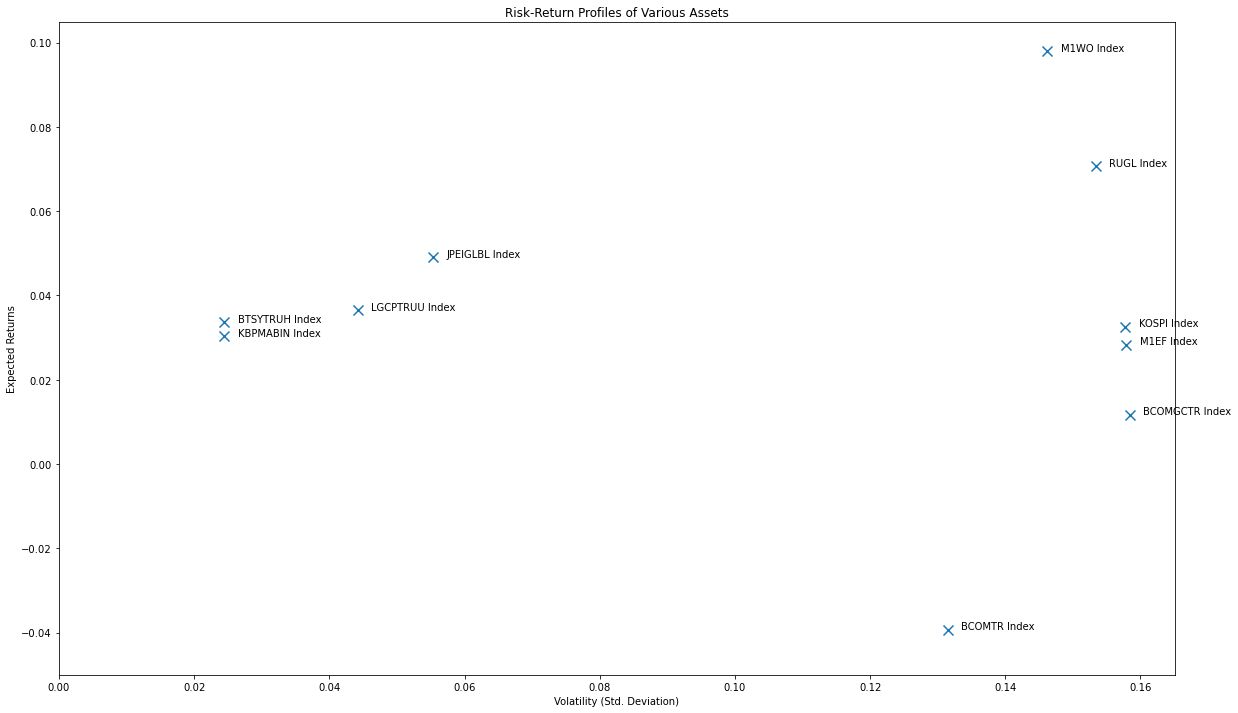

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl 
plt.figure(figsize=(20,12))
plt.scatter(annual_vol_d_log_ret, annual_d_log_ret, marker="x", s=100, alpha=1.0)
for i, label in enumerate(annual_d_log_ret.index):
    plt.text(annual_vol_d_log_ret[i]+0.002, annual_d_log_ret[i], label)
plt.xlim(left=0)
plt.ylim(bottom=-0.05)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Risk-Return Profiles of Various Assets')
plt.show()

<ipython-input-5-fb7d7a9c9d66>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(d_log_ret.corr(), dtype=np.bool)


<AxesSubplot:>

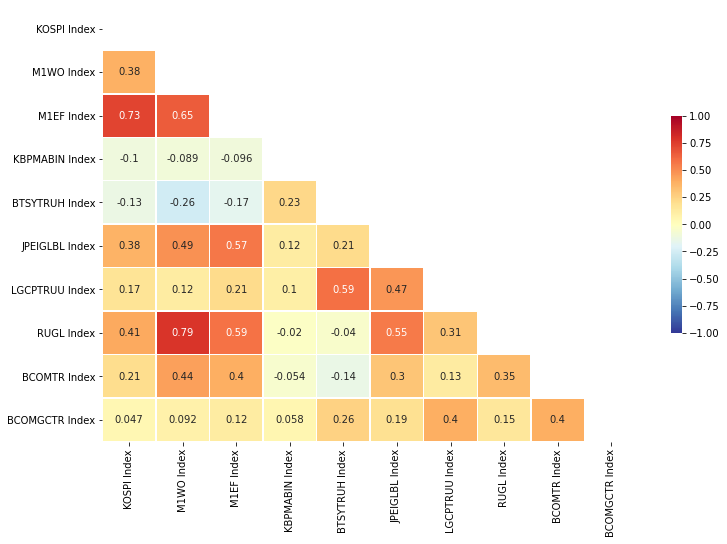

In [5]:
import seaborn as sns
plt.figure(figsize=(12,8))
# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(d_log_ret.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(d_log_ret.corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  

<ipython-input-6-b0fac080c7d1>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(w_log_ret.corr(), dtype=np.bool)


<AxesSubplot:>

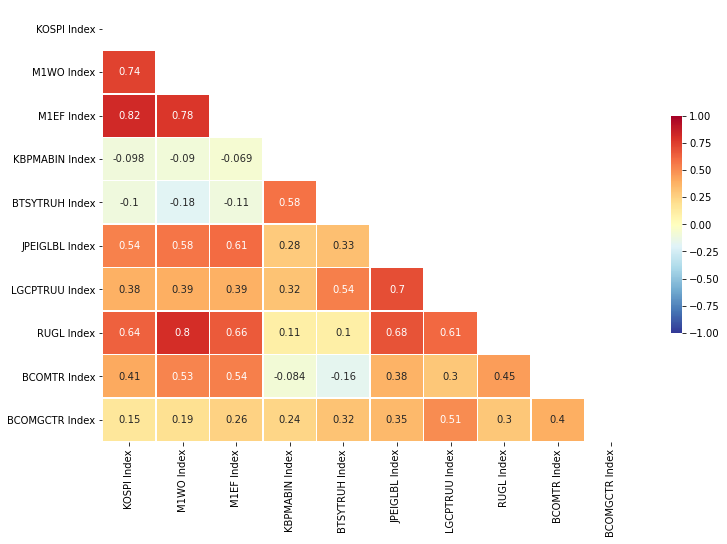

In [6]:
import seaborn as sns
plt.figure(figsize=(12,8))
# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(w_log_ret.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(w_log_ret.corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  

## 포트폴리오

### 포트폴리오 수익율 및 변동성

In [7]:
# equal weight ew 계산
num_asset = len(d_log_ret.columns)
ew = np.repeat(1/num_asset, num_asset)
ew

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [9]:
annual_pfo_log_ret = ew.T @ np.exp(annual_d_log_ret)
annual_pfo_log_ret

1.036389682656417

In [10]:
# 포트폴리오 변동성 계산
annual_pfo_vol = (ew.T @ annual_cov_w_log_ret @ ew)**0.5
annual_pfo_vol

0.08551992995803266

In [22]:
from scipy.optimize import minimize

def obj_variance(weights, cov):
    return np.sqrt(weights.T @ cov @ weights)

def obj_sharpe(weights, returns, cov, rf):
    ret = np.dot(weights, returns)
    vol = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))
    # return 1/((ret-rf)/np.sqrt(vol))
    return 1/((ret-rf)/vol)

# covmat=cov_daily*250
# weights =np.array([0.2, 0.2, 0.2, 0.2, 0.2])
# bnds = ((0,1), (0,1), (0,1), (0,1), (0,1))
# cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1}) 
# res = minimize(obj_variance, weights,(covmat), method='SLSQP', bounds=bnds, constraints=cons)

In [23]:
# 최소분산 포트폴리오 최적화
rf = 0.01
weights = np.ones([num_asset])/num_asset
bnds = tuple((0., 1.) for i in range(num_asset))
cons = ({'type': 'eq', 'fun': lambda w:  np.sum(w) - 1}) 
# res = minimize(obj_sharpe, weights,(pct_return_annual, covmat, rf), method='SLSQP', bounds=bnds, constraints=cons)
res_mv = minimize(obj_variance, weights,(annual_cov_w_log_ret), method='SLSQP', bounds=bnds, constraints=cons)

In [30]:
# 샤프비율 최대 포트폴리오 (주단위 공분산 사용)
rf = 0.01
weights = np.ones([num_asset])/num_asset
bnds = tuple((0., 1.) for i in range(num_asset))
cons = ({'type': 'eq', 'fun': lambda w:  np.sum(w) - 1}) 
res_sharpe = minimize(obj_sharpe, weights,(annual_d_log_ret, annual_cov_w_log_ret, rf), method='SLSQP', bounds=bnds, constraints=cons)

In [31]:
# 샤프비율 최대 포트폴리오 (일단위 공분산 사용)
rf = 0.01
weights = np.ones([num_asset])/num_asset
bnds = tuple((0., 1.) for i in range(num_asset))
cons = ({'type': 'eq', 'fun': lambda w:  np.sum(w) - 1}) 
res_sharpe_d = minimize(obj_sharpe, weights,(annual_d_log_ret, annual_cov_d_log_ret, rf), method='SLSQP', bounds=bnds, constraints=cons)

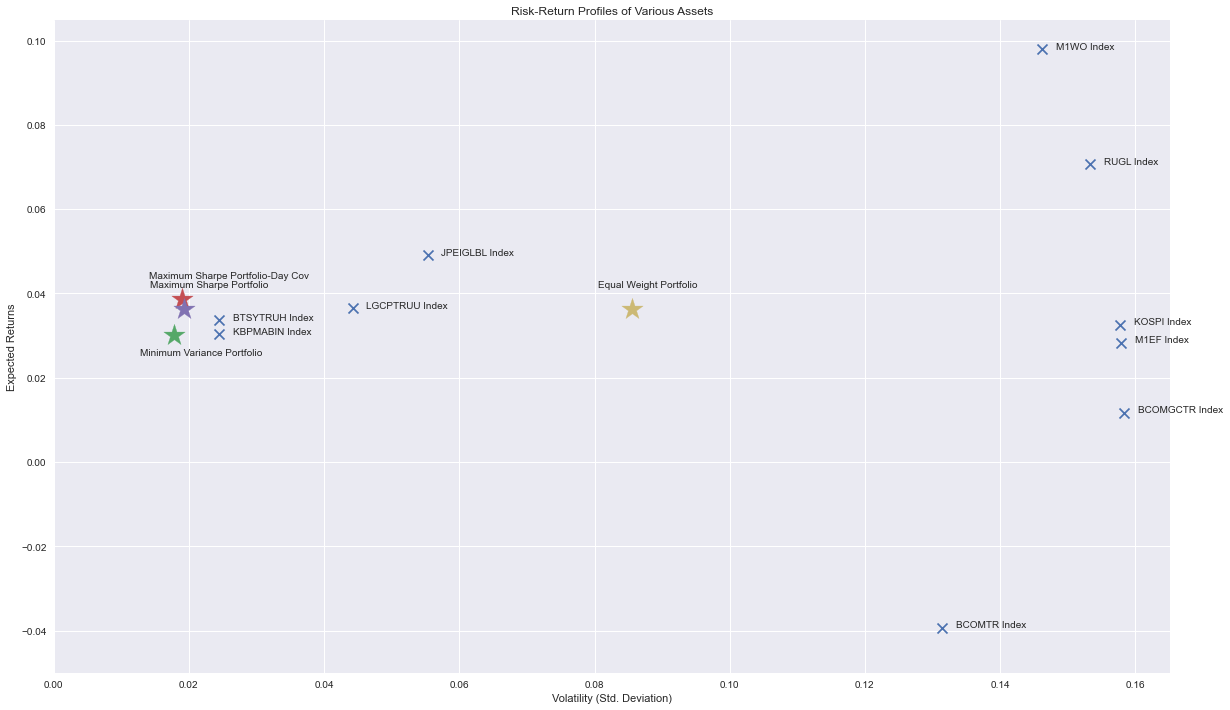

In [33]:
import matplotlib.pyplot as plt
import matplotlib as mpl 
plt.figure(figsize=(20,12))
plt.style.use('seaborn')
plt.scatter(annual_vol_d_log_ret, annual_d_log_ret, marker="x", s=100, alpha=1.0)
for i, label in enumerate(annual_d_log_ret.index):
    plt.text(annual_vol_d_log_ret[i]+0.002, annual_d_log_ret[i], label)
plt.xlim(left=0)
plt.ylim(bottom=-0.05)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Risk-Return Profiles of Various Assets')


ret_mv = np.sum(np.exp(annual_d_log_ret) * res_mv['x'])-1
vol_mv = np.sqrt(res_mv['x'].T @ annual_cov_w_log_ret @ res_mv['x'])
plt.scatter(vol_mv, ret_mv, marker="*", s=500, alpha=1.0)
plt.text(vol_mv-0.005, ret_mv-0.005, 'Minimum Variance Portfolio')

ret_sharpe_d = np.sum(np.exp(annual_d_log_ret) * res_sharpe_d['x'])-1
vol_sharpe_d = np.sqrt(res_sharpe_d['x'].T @ annual_cov_d_log_ret @ res_sharpe_d['x'])
plt.scatter(vol_sharpe_d, ret_sharpe_d, marker="*", s=500, alpha=1.0)
plt.text(vol_sharpe_d-0.005, ret_sharpe_d+0.005, 'Maximum Sharpe Portfolio-Day Cov')

ret_sharpe = np.sum(np.exp(annual_d_log_ret) * res_sharpe['x'])-1
vol_sharpe = np.sqrt(res_sharpe['x'].T @ annual_cov_w_log_ret @ res_sharpe['x'])
plt.scatter(vol_sharpe, ret_sharpe, marker="*", s=500, alpha=1.0)
plt.text(vol_sharpe-0.005, ret_sharpe+0.005, 'Maximum Sharpe Portfolio')

ret_ew = np.sum(np.exp(annual_d_log_ret) * ew) -1
vol_ew = np.sqrt(ew.T @ annual_cov_w_log_ret @ ew)
plt.scatter(vol_ew, ret_ew, marker="*", s=500, alpha=1.0)
plt.text(vol_ew-0.005, ret_ew+0.005, 'Equal Weight Portfolio')


plt.show()

In [ ]:
pfo_rets = []
pfo_vols = []
pfo_wgts = []

num_pfos = 100000

for s in range(num_pfos):
  wgt = np.random.random(num_asset)
  wgt /= np.sum(wgt)
  ret = np.dot(wgt, log_ret_annual)
  vol = np.sqrt(np.dot(wgt.T, np.dot(cov_annual, wgt)))
  pfo_rets.append(ret)
  pfo_vols.append(vol)
  pfo_wgts.append(wgt)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl 
pfo_vols = np.array(pfo_vols)
pfo_rets = np.array(pfo_rets)
colors = pfo_rets/pfo_vols
plt.style.use('seaborn')
plt.figure(figsize=(20,12))
plt.scatter(pfo_vols, pfo_rets, c=colors, marker='o', cmap=mpl.cm.jet)
plt.scatter(log_ret.std()*np.sqrt(250), log_ret_annual, marker="x", s=100, alpha=1.0)
for i, label in enumerate(log_ret_annual.index):
    plt.text(log_ret.std()[i]*np.sqrt(250), log_ret_annual[i]+0.002, label)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [ ]:
rets = np.sum(pct_return_annual * res['x'])
vol = np.sqrt(res['x'].T @ covmat @ res['x'])
p_volatility = np.array(p_volatility)
p_returns = np.array(p_returns)
colors = p_returns/p_volatility
plt.style.use('seaborn')
plt.xlim([0, 0.2])
plt.ylim([0, 0.15])
plt.scatter(p_volatility, p_returns, c=colors, marker='o', cmap=mpl.cm.jet)
plt.scatter(i_vol, i_ret, marker="x", s=100, alpha=1.0)
plt.scatter(vol, rets, marker="*", s=500, alpha=1.0)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [ ]:
from scipy.optimize import minimize

def obj_sharpe(weights, returns, covmat, rf):
    ret = np.dot(weights, returns)
    vol = np.sqrt(np.dot(weights.T, np.dot(covmat, weights)))
    # return 1/((ret-rf)/np.sqrt(vol))
    return 1/((ret-rf)/vol)

In [ ]:
# n_assets = len(columns)
# covmat=cov_daily*250
rf = 0.01
weights = np.ones([num_asset])/num_asset
bnds = tuple((0., 1.) for i in range(num_asset))
cons = ({'type': 'eq', 'fun': lambda w:  np.sum(w) - 1}) 
res = minimize(obj_sharpe, weights,(log_ret_annual, cov_annual_weekly, rf), method='SLSQP', bounds=bnds, constraints=cons)

In [ ]:
print(res)

In [ ]:
p_returns = []
p_volatility = []
p_weights = []

n_assets = len(columns)
n_ports = 30000

for s in range(n_ports):
  wgt = np.random.random(n_assets)
  wgt /= np.sum(wgt)
  ret = np.dot(wgt, pct_return_annual)
  vol = np.sqrt(np.dot(wgt.T, np.dot(cov_annual, wgt)))
  p_returns.append(ret)
  p_volatility.append(vol)
  p_weights.append(wgt)

In [ ]:
# rets = np.sum(pct_return_daily.mean() * res['x']) * 250
rets = np.sum(pct_return_annual * res['x'])
vol = np.sqrt(res['x'].T @ covmat @ res['x'])
p_volatility = np.array(p_volatility)
p_returns = np.array(p_returns)
colors = p_returns/p_volatility
plt.style.use('seaborn')
plt.xlim([0, 0.2])
plt.ylim([0, 0.15])
plt.scatter(p_volatility, p_returns, c=colors, marker='o', cmap=mpl.cm.jet)
plt.scatter(vol, rets, marker="*", s=500, alpha=1.0)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [ ]:
np.sqrt(cov_annual)

In [ ]:
res['x'].round(10)

In [ ]:
from scipy.optimize import minimize

def obj_variance(weights, cov):
    return np.sqrt(weights.T @ covmat @ weights)

# covmat=cov_daily*250
# weights =np.array([0.2, 0.2, 0.2, 0.2, 0.2])
# bnds = ((0,1), (0,1), (0,1), (0,1), (0,1))
# cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1}) 
# res = minimize(obj_variance, weights,(covmat), method='SLSQP', bounds=bnds, constraints=cons)

In [ ]:
n_assets = len(columns)
covmat=cov_daily*250
rf = 0.01
weights = np.ones([n_assets])/n_assets
bnds = tuple((0., 1.) for i in range(n_assets))
cons = ({'type': 'eq', 'fun': lambda w:  np.sum(w) - 1}) 
# res = minimize(obj_sharpe, weights,(pct_return_annual, covmat, rf), method='SLSQP', bounds=bnds, constraints=cons)
res = minimize(obj_variance, weights,(covmat), method='SLSQP', bounds=bnds, constraints=cons)

In [ ]:
print(res)

In [ ]:
res['x'].round(4)

In [ ]:
p_returns = []
p_volatility = []
p_weights = []

n_assets = len(columns)
n_ports = 10000

for s in range(n_ports):
  wgt = np.random.random(n_assets)
  wgt /= np.sum(wgt)
  ret = np.dot(wgt, pct_return_annual)
  vol = np.sqrt(np.dot(wgt.T, np.dot(cov_annual, wgt)))
  p_returns.append(ret)
  p_volatility.append(vol)
  p_weights.append(wgt)

In [ ]:
vol_annual = pct_return_daily.std() * np.sqrt(250)

In [ ]:
i_vol = np.array(vol_annual)
i_ret = np.array(pct_return_annual)

In [ ]:
rets = np.sum(pct_return_annual * res['x'])
vol = np.sqrt(res['x'].T @ covmat @ res['x'])
p_volatility = np.array(p_volatility)
p_returns = np.array(p_returns)
colors = p_returns/p_volatility
plt.style.use('seaborn')
plt.xlim([0, 0.2])
plt.ylim([0, 0.15])
plt.scatter(p_volatility, p_returns, c=colors, marker='o', cmap=mpl.cm.jet)
plt.scatter(i_vol, i_ret, marker="x", s=100, alpha=1.0)
plt.scatter(vol, rets, marker="*", s=500, alpha=1.0)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [ ]:
cov_annual.to_csv('cov_annual.csv')

In [ ]:
# 기간별 누적수익율

#1) 일반 수익율
cum_pct_ret = (pct_ret + 1).cumprod()-1

#2) 로그 수익율
cum_log_ret = log_ret.cumsum()

cum_pct_ret.plot(figsize=(20,8), title='Cumulative Percent Return')
cum_log_ret.plot(figsize=(20,8), title='Cumulative Log Return')


## 탐색적 데이터 분석(EDA: Exploratory Data Analysis)

In [ ]:
log_ret.info()

In [ ]:
log_ret.describe()

In [ ]:
log_ret.std() # sample standard deviation

### wealth index
시작시점의 가격,보유금액,지수 등을 1000으로 보고 포트폴리오의 가치변동 계산

In [ ]:
wealth_index_pct = 1000 * (pct_ret + 1).cumprod() # 누적 기간 수익율에 기초자산금액 1000을 곱함
wealth_index_pct.plot(figsize=(20,8))

wealth_index = 1000 * np.exp(log_ret.cumsum()) # 누적 기간 수익율에 기초자산금액 1000을 곱함
wealth_index.plot(figsize=(20,8))

### previous peak(직전 고점)
Drawdown 을 구하기 위한 과정

In [ ]:
previous_peaks = wealth_index.cummax() # pandas 의 cummax() 메소드 활용
previous_peaks.plot(figsize=(20,8))

### drawdown
현재가 - 직전고점

In [ ]:
drawdown = (wealth_index - previous_peaks) / previous_peaks
drawdown.plot(figsize=(20,8))

### MDD : Maximum Drawdown

In [ ]:
maximum_drawdown = drawdown.min() # drawdown 중 가장 작은 값
maximum_drawdown

In [ ]:
drawdown["2021":].min() # 2021년 이후 maximum drawdown

In [ ]:
drawdown.idxmin() # drawdown 중 가장 작은 값이 나온 시점 (max drawdown 시점)